In [1]:
import sys, os
import scDART
import pandas as pd
import numpy as np
import importlib

importlib.reload(scDART)

<module 'scDART' from 'c:\\Users\\jenso\\Study\\GT\\scdart\\scDART.py'>

In [2]:
sc = scDART.scDART(n_epochs=100)

In [3]:
p = "./data/Endo/"
# TODO: read the data here, and transform the data into numpy matrix, don't put anno file into the fit_tranform function (only use anno file when plot)

dataset = (p + "counts_rna.csv", p + "anno_rna.txt", None, p + "counts_atac.csv", p + "anno_atac.txt", None, p+"region2gene.csv")

In [4]:
rna_count = pd.read_csv(dataset[0], index_col=0).values
rna_anno = []
with open(dataset[1], "r") as fp:
    for i in fp:
        rna_anno.append(i.strip("\n"))
rna_anno = np.array(rna_anno)

In [5]:
atac_count = pd.read_csv(dataset[3], index_col=0).values
atac_count = np.where(atac_count < 1, 0, 1)
atac_anno = []
with open(dataset[4], "r") as fp:
    for i in fp:
        atac_anno.append(i.strip("\n"))
atac_anno = np.array(atac_anno)

In [6]:
reg = pd.read_csv(dataset[-1], index_col=0, header=0).values

In [7]:
print(rna_count.shape, rna_anno.shape)
print(atac_count.shape, atac_anno.shape)
print(reg.shape)

(1628, 497) (1628,)
(1186, 11487) (1186,)
(11487, 497)


In [8]:
sc.fit_transform(rna_count = rna_count, atac_count = atac_count, reg = reg)

Loaded dataset
Device:  cuda
Number of anchor cells not specified, using exact mode for distance calculation instead.
Diffusion distance calculated, time used (sec): 11.154458284378052
Diffusion distance calculated, time used (sec): 7.375482559204102
Model: {'gene_act': gene_act(
  (fc_layers): Sequential(
    (Layer 0): Sequential(
      (linear): Linear(in_features=11487, out_features=512, bias=False)
      (batchnorm): BatchNorm1d(512, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (act): LeakyReLU(negative_slope=0.2)
      (dropout): None
    )
    (Layer 1): Sequential(
      (linear): Linear(in_features=512, out_features=256, bias=False)
      (batchnorm): BatchNorm1d(256, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (act): LeakyReLU(negative_slope=0.2)
      (dropout): None
    )
    (Layer 2): Sequential(
      (linear): Linear(in_features=256, out_features=497, bias=False)
      (batchnorm): BatchNorm1d(497, eps=0.001, momentum

(tensor([[ 0.2349, -0.1840, -0.2338,  ...,  0.1339,  0.3014, -0.2639],
         [ 0.2884, -0.1271, -0.2428,  ...,  0.1065,  0.1735,  0.0322],
         [ 0.4120, -0.1485, -0.2853,  ..., -0.1159,  0.1972, -0.2758],
         ...,
         [-1.1096,  0.0885, -0.2154,  ..., -2.1257, -0.0396, -2.9285],
         [-0.7151, -0.3124, -0.1976,  ..., -2.4778, -0.6800, -2.5651],
         [-1.2398, -0.0727, -0.2704,  ..., -2.3898, -0.6521, -2.6157]]),
 tensor([[ 0.4155,  0.0392, -0.0833,  ...,  0.0125,  0.0297, -0.1428],
         [ 0.4456,  0.0088, -0.1259,  ..., -0.0533,  0.3033, -0.0617],
         [ 0.0964, -0.0868, -0.1522,  ...,  0.1421, -0.0655, -0.0870],
         ...,
         [-1.1978,  0.1223, -0.4040,  ..., -2.4629, -0.9947, -2.6978],
         [-0.9813,  0.0411, -0.5375,  ..., -2.2407, -0.4573, -2.9632],
         [-0.7923,  0.2183, -0.5362,  ..., -2.1940, -0.2900, -2.5822]]))

test_endo_embedding.pdf


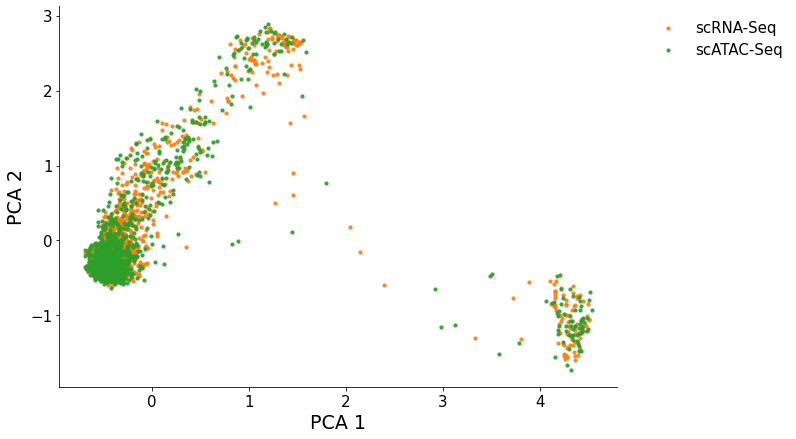

In [18]:
sc.visualize(mode ="embedding", save_path="test_endo_embedding.pdf")

running Leiden clustering
finished
None


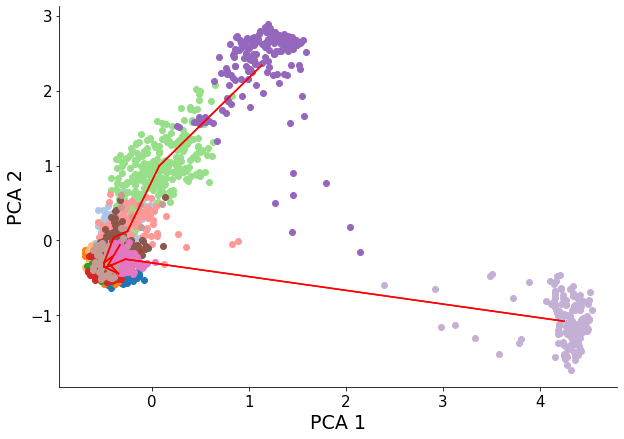

In [11]:
sc.visualize(mode ="backbone")

running Leiden clustering
finished
None


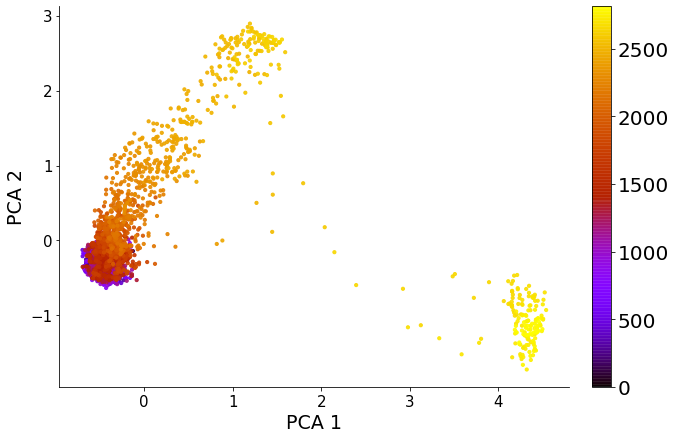

In [12]:
sc.visualize(mode ="pseudotime")

In [9]:
sc.transform(rna_count = rna_count, atac_count= atac_count)

Transform finished


(tensor([[ 0.2349, -0.1840, -0.2338,  ...,  0.1339,  0.3014, -0.2639],
         [ 0.2884, -0.1271, -0.2428,  ...,  0.1065,  0.1735,  0.0322],
         [ 0.4120, -0.1485, -0.2853,  ..., -0.1159,  0.1972, -0.2758],
         ...,
         [-1.1096,  0.0885, -0.2154,  ..., -2.1257, -0.0396, -2.9285],
         [-0.7151, -0.3124, -0.1976,  ..., -2.4778, -0.6800, -2.5651],
         [-1.2398, -0.0727, -0.2704,  ..., -2.3898, -0.6521, -2.6157]]),
 tensor([[ 0.4155,  0.0392, -0.0833,  ...,  0.0125,  0.0297, -0.1428],
         [ 0.4456,  0.0088, -0.1259,  ..., -0.0533,  0.3033, -0.0617],
         [ 0.0964, -0.0868, -0.1522,  ...,  0.1421, -0.0655, -0.0870],
         ...,
         [-1.1978,  0.1223, -0.4040,  ..., -2.4629, -0.9947, -2.6978],
         [-0.9813,  0.0411, -0.5375,  ..., -2.2407, -0.4573, -2.9632],
         [-0.7923,  0.2183, -0.5362,  ..., -2.1940, -0.2900, -2.5822]]))

In [15]:
sc.save_model("endo_test.pt")

Model saved


In [16]:
sc.load_model("endo_test.pt")

{'gene_act': gene_act(
  (fc_layers): Sequential(
    (Layer 0): Sequential(
      (linear): Linear(in_features=11487, out_features=512, bias=False)
      (batchnorm): BatchNorm1d(512, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (act): LeakyReLU(negative_slope=0.2)
      (dropout): None
    )
    (Layer 1): Sequential(
      (linear): Linear(in_features=512, out_features=256, bias=False)
      (batchnorm): BatchNorm1d(256, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (act): LeakyReLU(negative_slope=0.2)
      (dropout): None
    )
    (Layer 2): Sequential(
      (linear): Linear(in_features=256, out_features=497, bias=False)
      (batchnorm): BatchNorm1d(497, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (act): LeakyReLU(negative_slope=0.2)
      (dropout): None
    )
  )
), 'encoder': Encoder(
  (fc): FC(
    (fc_layers): Sequential(
      (Layer 0): Sequential(
        (linear): Linear(in_features=497, ou